# Combining ISEAR and GoEmotions: Handling Class Imbalance Using Class Weighting

This Colab notebook continues the exploration of the combined **ISEAR** and **GoEmotions** dataset for emotion classification, with a focus on addressing class imbalance using the **class weighting technique**. By assigning higher weights to minority classes during model training, we ensure that all emotions are fairly represented in the classification task.

### Key Highlights:
1. **Dataset Preparation:**
   - Load the combined dataset and visualize the class distribution.
   - Split the data into training and testing sets.

2. **Feature Engineering:**
   - Transform textual data into numerical features using **TF-IDF Vectorization**.

3. **Class Weighting Technique:**
   - Apply class weighting in classifiers to mitigate the impact of class imbalance.

4. **Model Training and Evaluation:**
   - Train and evaluate four classifiers:
     - Logistic Regression
     - Naive Bayes
     - Decision Tree
     - Random Forest
   - Use metrics such as accuracy, classification reports, and confusion matrices for evaluation.

5. **Accuracy Comparison:**
   - Visualize and compare the performance of all classifiers using bar plots.

This notebook demonstrates how to effectively handle imbalanced datasets by leveraging class weighting techniques during model training.


# Step 1: Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 2: Load the combined dataset

In [2]:
# Load the combined dataset from the saved CSV file
combined_df = pd.read_csv('Combined_Emotion_Dataset.csv')

# Check for any null values in the dataset
print("\n--- Null Values in Combined Dataset ---")
print(combined_df.isnull().sum())


--- Null Values in Combined Dataset ---
EMOTION         0
cleaned_text    0
dtype: int64


<ipython-input-3-f70d84a7ee8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x='EMOTION', order=combined_df['EMOTION'].value_counts().index, palette='viridis')


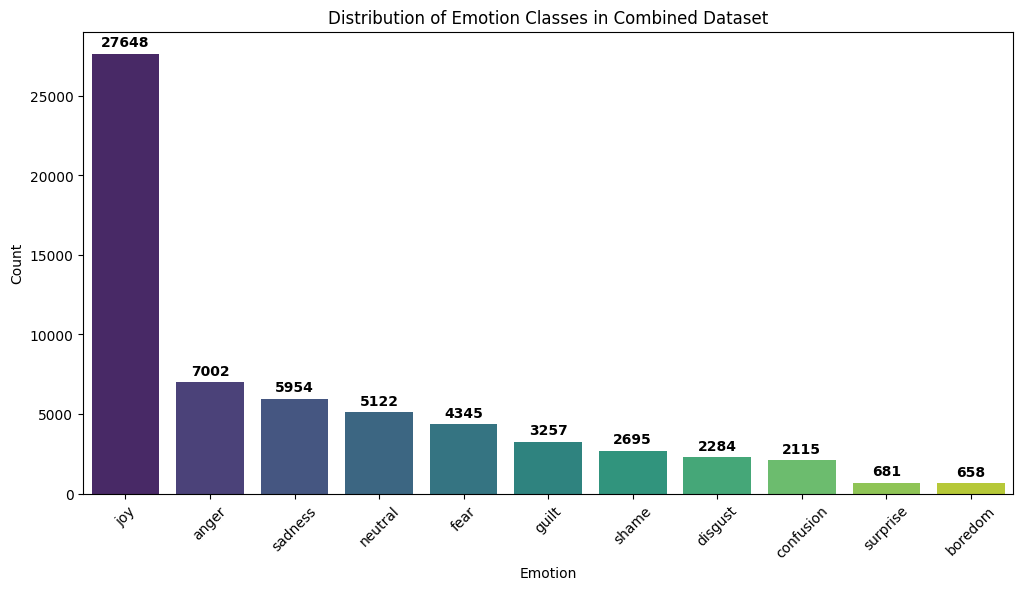

In [3]:
# Plotting the distribution of classes in the combined dataset with count labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_df, x='EMOTION', order=combined_df['EMOTION'].value_counts().index, palette='viridis')
plt.title("Distribution of Emotion Classes in Combined Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points',
                fontsize=10, color='black', weight='bold')

plt.show()

In [4]:
# `combined_df` is the dataframe with columns 'EMOTION' and 'cleaned_text'
X = combined_df['cleaned_text']
y = combined_df['EMOTION']

# Step 3: Split the Data into Train and Test Sets

In [5]:
# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Text Vectorization using TF-IDF

In [6]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)  # Transform X_train to TF-IDF
X_test_tfidf = tfidf.transform(X_test)        # Transform X_test to TF-IDF

# Step 5: Train and Evaluate Models after applying Class Weighting

## Define function to plot confusion matrix with highlighted diagonal

In [7]:
def plot_confusion_matrix(y_true, y_pred, model_name, emotion_labels):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels, cbar=False)

    # Highlight the diagonal elements with orange rectangles
    for i in range(cm.shape[0]):
        plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='orange', lw=2))

    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

## Define function to train and evaluate each model

In [8]:
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test, emotion_labels):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred, model_name, emotion_labels)
    return accuracy

In [9]:
# Load emotion labels
emotion_labels = ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'neutral', 'confusion', 'surprise' , 'boredom']  # Adjust based on your dataset


--- Logistic Regression ---
Accuracy: 0.4071075852019752
Classification Report:
               precision    recall  f1-score   support

       anger       0.60      0.47      0.53      1403
     boredom       0.29      0.76      0.42       124
   confusion       0.16      0.46      0.23       438
     disgust       0.23      0.50      0.31       451
        fear       0.29      0.38      0.33       839
       guilt       0.21      0.31      0.25       690
         joy       0.74      0.34      0.47      5526
     neutral       0.56      0.65      0.60      1018
     sadness       0.37      0.42      0.39      1172
       shame       0.20      0.37      0.26       572
    surprise       0.16      0.61      0.26       120

    accuracy                           0.41     12353
   macro avg       0.35      0.48      0.37     12353
weighted avg       0.54      0.41      0.43     12353



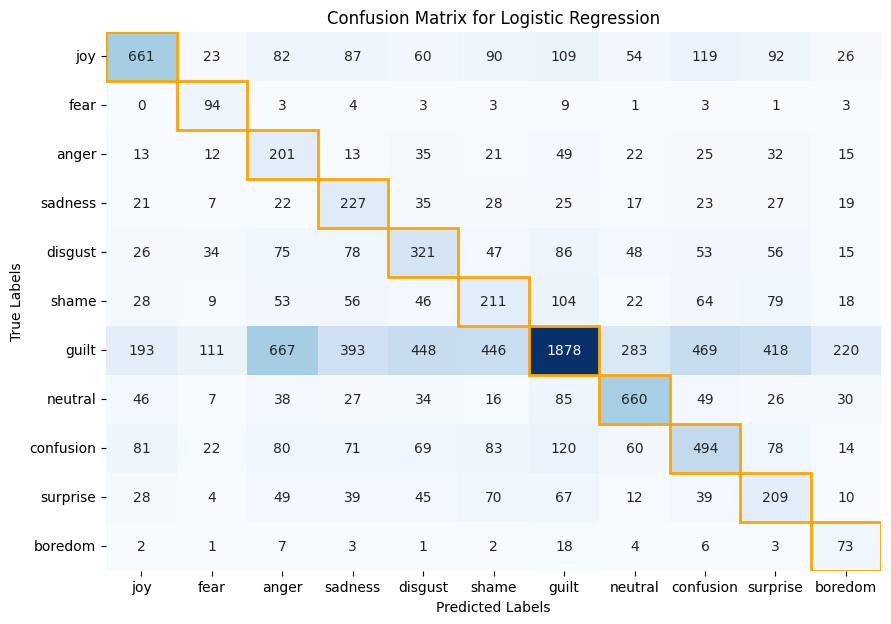


--- Naive Bayes ---
Accuracy: 0.5032785558164009


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       anger       0.73      0.23      0.35      1403
     boredom       0.00      0.00      0.00       124
   confusion       1.00      0.00      0.00       438
     disgust       0.84      0.05      0.09       451
        fear       0.81      0.08      0.15       839
       guilt       0.65      0.04      0.08       690
         joy       0.48      0.99      0.65      5526
     neutral       0.82      0.19      0.31      1018
     sadness       0.60      0.06      0.11      1172
       shame       0.79      0.05      0.10       572
    surprise       0.00      0.00      0.00       120

    accuracy                           0.50     12353
   macro avg       0.61      0.16      0.17     12353
weighted avg       0.62      0.50      0.39     12353



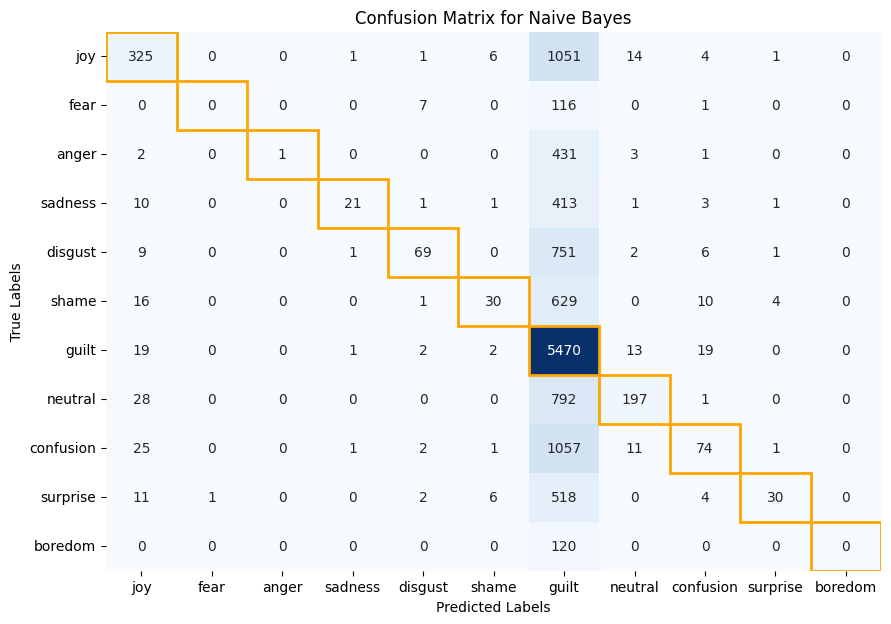


--- Random Forest ---
Accuracy: 0.5613211365660163
Classification Report:
               precision    recall  f1-score   support

       anger       0.68      0.43      0.52      1403
     boredom       0.54      0.40      0.46       124
   confusion       0.42      0.07      0.12       438
     disgust       0.55      0.22      0.32       451
        fear       0.59      0.20      0.30       839
       guilt       0.50      0.12      0.20       690
         joy       0.55      0.88      0.68      5526
     neutral       0.63      0.53      0.57      1018
     sadness       0.52      0.30      0.38      1172
       shame       0.63      0.18      0.28       572
    surprise       0.46      0.31      0.37       120

    accuracy                           0.56     12353
   macro avg       0.55      0.33      0.38     12353
weighted avg       0.57      0.56      0.51     12353



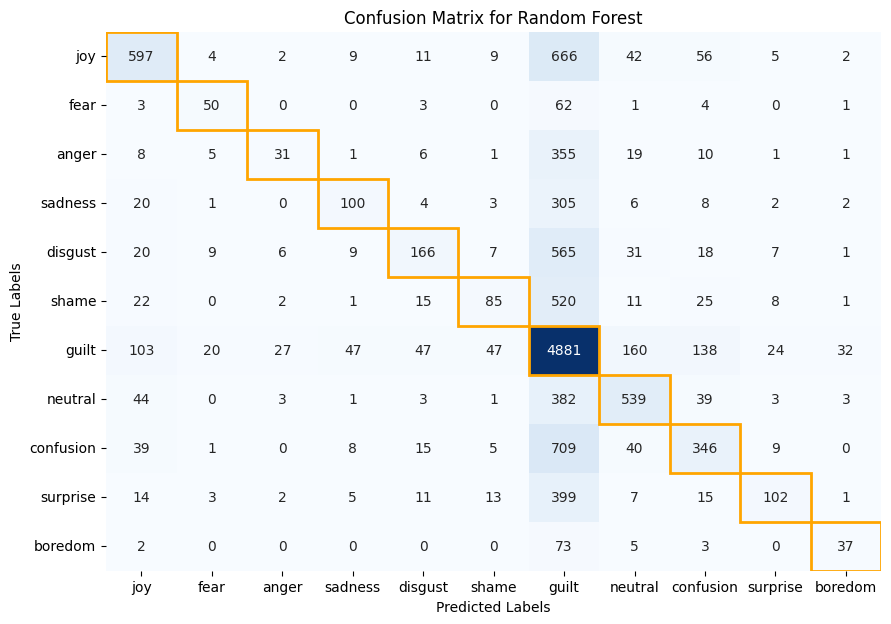


--- Decision Tree ---
Accuracy: 0.4190075285355784
Classification Report:
               precision    recall  f1-score   support

       anger       0.45      0.44      0.44      1403
     boredom       0.30      0.50      0.38       124
   confusion       0.13      0.17      0.15       438
     disgust       0.22      0.29      0.25       451
        fear       0.22      0.25      0.23       839
       guilt       0.18      0.19      0.19       690
         joy       0.59      0.52      0.56      5526
     neutral       0.49      0.52      0.51      1018
     sadness       0.31      0.32      0.31      1172
       shame       0.21      0.23      0.22       572
    surprise       0.19      0.34      0.25       120

    accuracy                           0.42     12353
   macro avg       0.30      0.34      0.32     12353
weighted avg       0.44      0.42      0.43     12353



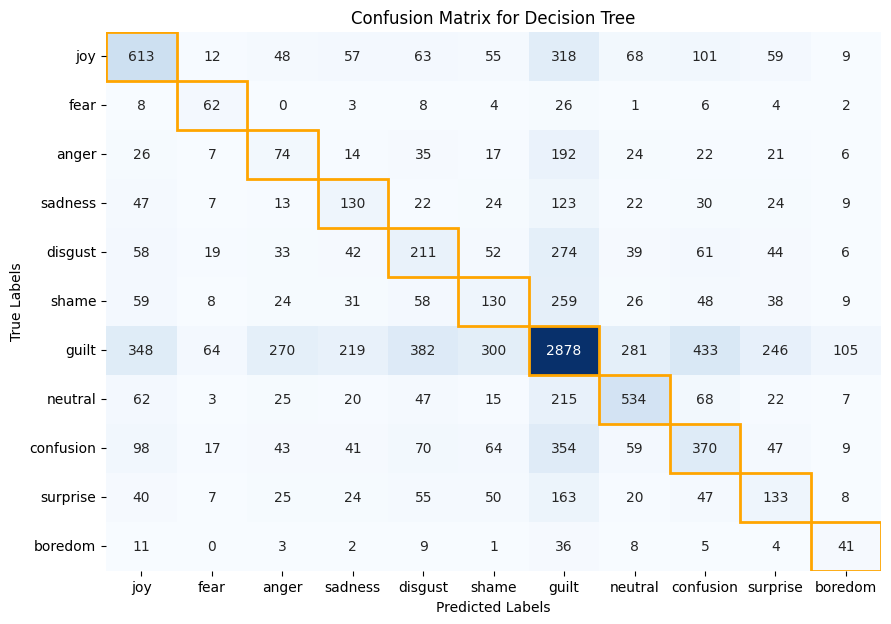

In [10]:
# Initialize models with class weighting
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),  # NB doesn't directly support class_weight; used for comparison
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')

}

# Dictionary to store accuracy results
accuracy_results = {}

# Train and evaluate each model using TF-IDF data
for model_name, model in models.items():
    accuracy = train_and_evaluate_model(model, model_name, X_train_tfidf, y_train, X_test_tfidf, y_test, emotion_labels)
    accuracy_results[model_name] = accuracy

# Step 6: Plot Accuracy Results for Each Resampling Technique

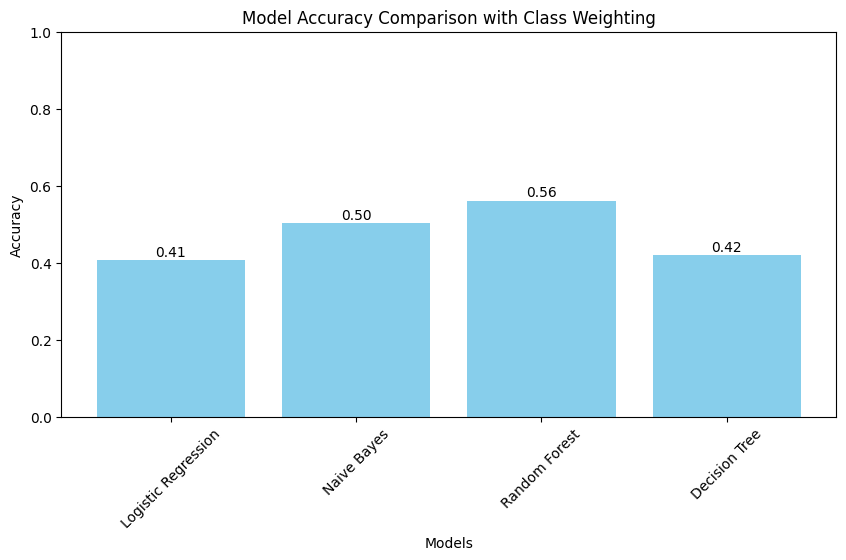

In [11]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Model Accuracy Comparison with Class Weighting')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
# Add accuracy values on top of bars
for i, (model_name, acc) in enumerate(accuracy_results.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

plt.show()